# Author: JISS PETER , Data Science Intern @ The Spark Foundation
The task related dataset is available on the web url https://finance.yahoo.com and https://bit.ly/36fFPI6. This dataset can be downloaded locally or can access directly in the code.

# Data Science & Business Analytics Internship at The Sparks Foundation.
#### #GRIPJAN21

## GRIP-Task 7 - Stock Market Prediction using Numerical and Textual Analysis

### Task Description

* Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
* Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
* Download historical stock prices from finance.yahoo.com
* Download textual (news) data from https://bit.ly/36fFPI6

# Import all libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from datetime import date 
import yfinance as yf
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1. Numerical Analysis

In [ ]:
#Web data reader is extension of pandas library to communicate with frequently updating data
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2019, 12, 31)

df = web.DataReader("MSFT", 'yahoo', start, end)
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,155.730255
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,157.006729
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,157.293686
2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,155.938049
2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,156.046890


* We have the data of Microsoft stocks of 19 years from January 2000 till December 2019.

* We analyse stocks using two measurements- Rolling mean and Return rate.

* Rolling Mean - Rolling is a very useful operation for time series data. Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data. In pandas

* Moving Average- technical analysis tool that smooths out price data by creating a constantly updated average price.

# A) Data Analysis

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,59.3125,56.00000,58.68750,58.28125,53228400.0,37.102634
2000-01-04,58.5625,56.12500,56.78125,56.31250,54119000.0,35.849308
2000-01-05,58.1875,54.68750,55.56250,56.90625,64059600.0,36.227283
2000-01-06,56.9375,54.18750,56.09375,55.00000,54976600.0,35.013741
2000-01-07,56.1250,53.65625,54.31250,55.71875,62013600.0,35.471302


In [ ]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.tail(10)

Date
2019-12-17    139.752159
2019-12-18    139.893509
2019-12-19    140.054802
2019-12-20    140.273019
2019-12-23    140.473642
2019-12-24    140.685370
2019-12-26    140.955960
2019-12-27    141.205044
2019-12-30    141.434773
2019-12-31    141.630108
Name: Adj Close, dtype: float64

In [ ]:
df.shape

(5031, 6)

* The profit or loss calculation is usually determined by the closing price of a stock; hence we will consider the closing price as the target variable.

# B) Data Visualization

# i) Movement of Data: Closing Stock

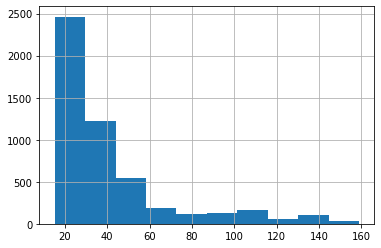

In [ ]:
#Closing Stock
df['Close'].hist()

Text(0, 0.5, 'Close')

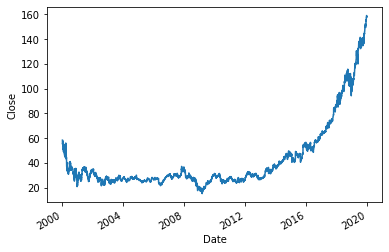

In [ ]:
df['Close'].plot()
plt.xlabel("Date")
plt.ylabel("Close")

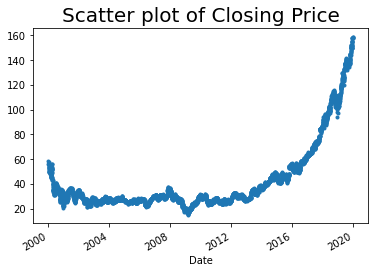

In [ ]:
df['Close'].plot(style='.')
plt.title("Scatter plot of Closing Price")
plt.title('Scatter plot of Closing Price',fontsize=20)
plt.show()

* It shows an Upward trend so, the data is not stationary. Now we go with rolling mean and rolling standard deviation.
* ADF (Augmented Dickey-Fuller) Test

* The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

* 1.Null Hypothesis: The series has a unit root (value of a =1)

* 2.Alternate Hypothesis: The series has no unit root.

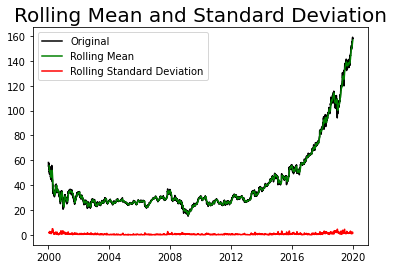

Results of dickey fuller test
Test Statistics                   4.581411
p-value                           1.000000
No. of lags used                  8.000000
Number of observations used    5022.000000
critical value (1%)              -3.431653
critical value (5%)              -2.862116
critical value (10%)             -2.567076
dtype: float64


In [ ]:
#Test for staionarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolling_mean = timeseries.rolling(12).mean()
    rolling_std = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='Black',label='Original')
    plt.plot(rolling_mean, color='Green', label='Rolling Mean')
    plt.plot(rolling_std, color='Red', label = 'Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation',fontsize=20)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df['Close'])

* By looking at the above graph it can be seen that the mean and standard deviation are increasing and hence our data is not stationary. The p-value is greater than 0.05, and hence we cannot reject the null hypothesis, and the null hypothesis states that the series has unit root and hence is not stationary.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


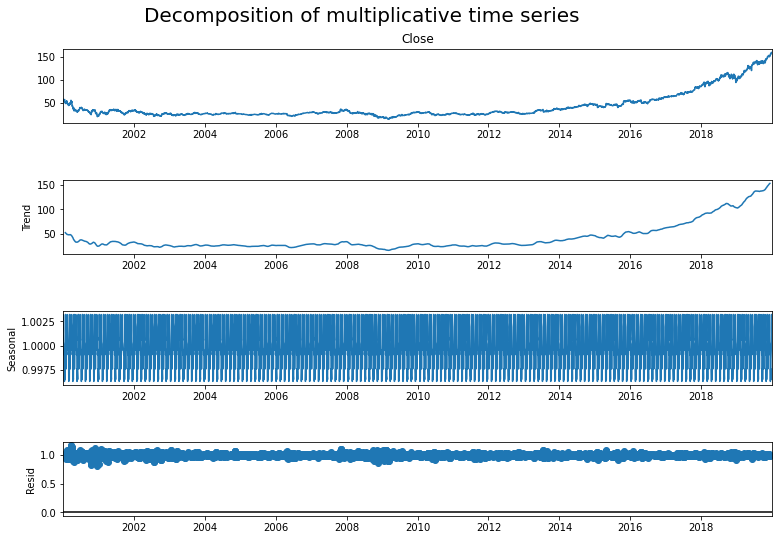

In [ ]:
#Doing a quick vanilla decomposition to see any trend seasonality etc in the ts
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.Close, model='multiplicative',freq=30)
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series',fontsize=20)
plt.show()

No handles with labels found to put in legend.


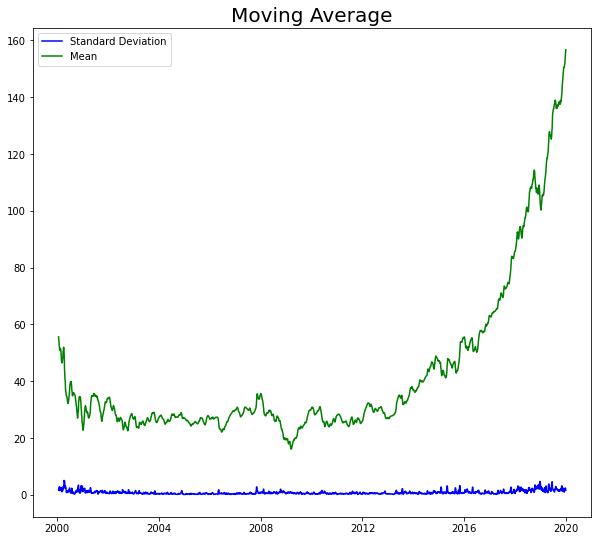

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 9
df_log = np.log(df.Close)
moving_avg = df.Close.rolling(12).mean()
std_dev = df.Close.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average',fontsize=20)
plt.plot(std_dev, color ="Blue", label = "Standard Deviation")
plt.plot(moving_avg, color="Green", label = "Mean")
plt.legend()
plt.show()

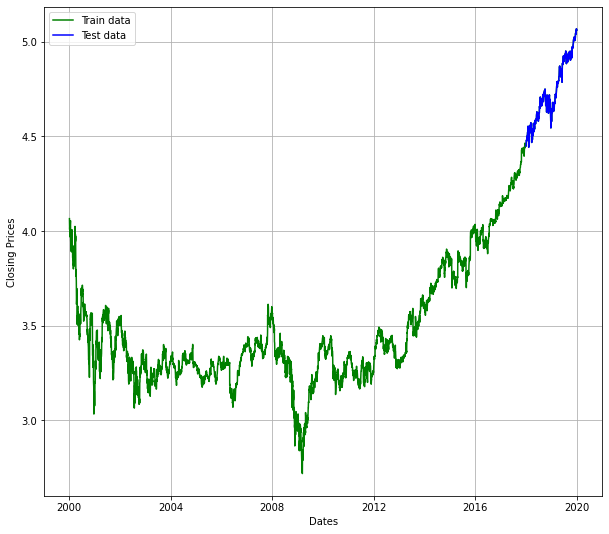

In [ ]:
#Split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
import statsmodels
from statsmodels import compat
from statsmodels.compat import pandas
from pmdarima.arima import auto_arima

auto_arima_model = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-22832.327, Time=0.77 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22837.605, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-22837.985, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-22834.211, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-22843.360, Time=1.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-22838.800, Time=6.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-22839.784, Time=2.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-22839.018, Time=1.81 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-22838.391, Time=0.90 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-22836.985, Time=5.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-22845.213, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-22839.859, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-22839.480, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-22840.661, Time=1.42 sec
 ARIM

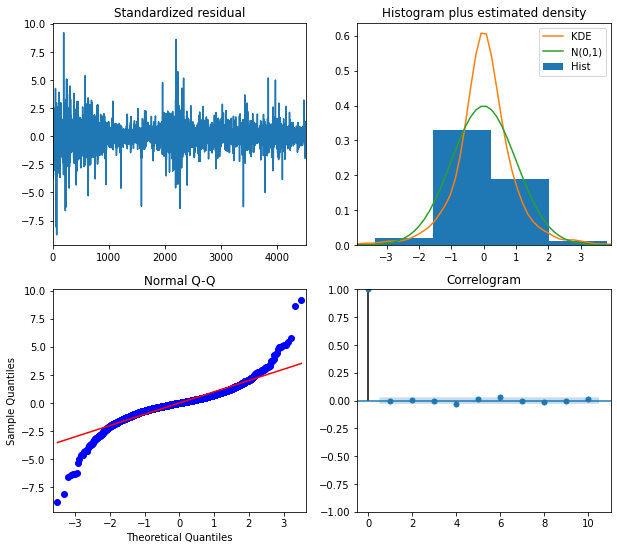

In [ ]:
auto_arima_model.plot_diagnostics()
plt.show()

###### Plot Interpretation

* Standardized Residuals: The plot shows the residual errors, the residuals seems to fluctuate around zero i.e. the mean and hence it seems that the variance is uniform.

* Histogram plus estimated density: The plot is bell shapes and hence a normal distribution. So for a normal distribution the mean is zero.

* Q-Q Plot: In the Q-Q plot the dots fall perfectly on the line and hence the distribution is non-skewed.

* Correlogram: It is also called Auto Correlation Function, which shows serial correlation in the data that changes over time. On the y axis is the autocorrelation. The x axis tells you the lag. So, if x=1 we have a lag of 1. If x=2, we have a lag of 2.

* The auto_arima model suggets that the best fit model is ARIMA(2,1,0) and the fit time is 13.985 seconds.



In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_arima=ARIMA(train_data,order=(2,1,0))
fit_model=model_arima.fit()
print(fit_model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4523
Model:                 ARIMA(2, 1, 0)   Log Likelihood               11423.196
Method:                       css-mle   S.D. of innovations              0.019
Date:                Mon, 18 Jan 2021   AIC                         -22838.392
Time:                        13:50:57   BIC                         -22812.724
Sample:                             1   HQIC                        -22829.350
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.787e-05      0.000      0.362      0.717      -0.000       0.001
ar.L1.D.Close    -0.0411      0.015     -2.765      0.006      -0.070      -0.012
ar.L2.D.Close    -0.0248      0.015     

In [ ]:
fc, se, conf = fit_model.forecast(504, alpha=0.05) 
fc_series = pd.Series(fc, index=test_data.index)
low = pd.Series(conf[:, 0], index=test_data.index)
up = pd.Series(conf[:, 1], index=test_data.index)

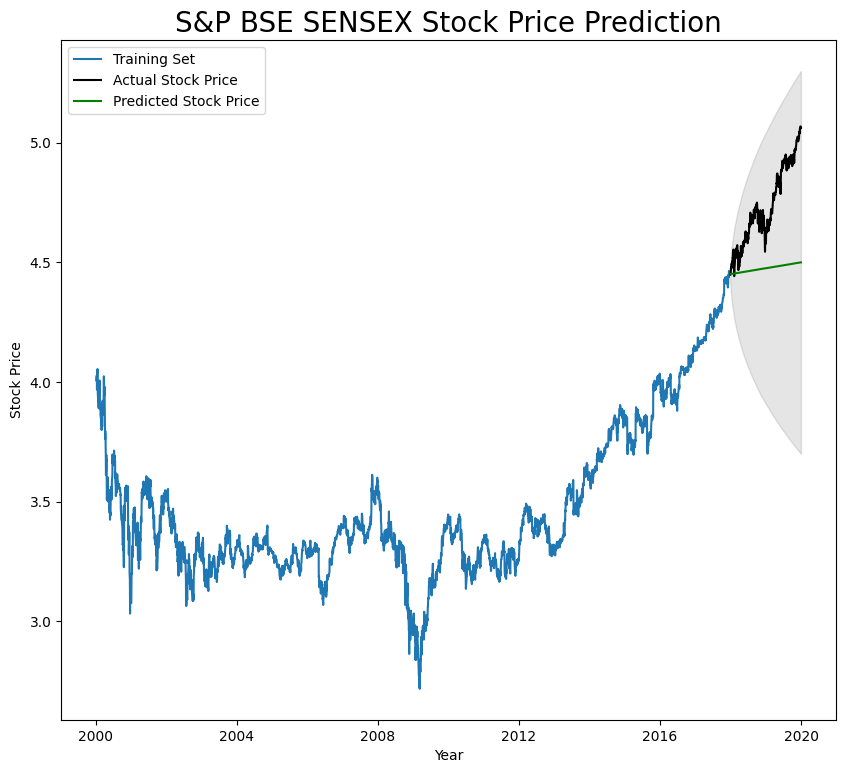

In [ ]:
plt.figure(figsize=(10,9), dpi=100)
plt.plot(train_data, label='Training Set')
plt.plot(test_data, color = 'Black', label='Actual Stock Price')
plt.plot(fc_series, color = 'Green',label='Predicted Stock Price')
plt.fill_between(low.index, low, up, color='k', alpha=.10)
plt.title('S&P BSE SENSEX Stock Price Prediction',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend(fontsize=10,loc='upper left')
plt.show()

# ii) Analyze stocks of various IT giants like Microsoft, Apple, Amazon, Google ,IBM.                                                 

In [ ]:
dfcomp = web.DataReader(['MSFT' , 'AAPL' , 'AMZN' , 'GOOG' , 'IBM'], 'yahoo', start=start, end=end)['Adj Close']
dfcomp.head()

Symbols,MSFT,AAPL,AMZN,GOOG,IBM
Date,,,,,
2000-01-03,37.102634,0.862169,89.3750,NaN,73.865021
2000-01-04,35.849308,0.789480,81.9375,NaN,71.357750
2000-01-05,36.227283,0.801032,69.7500,NaN,73.865021
2000-01-06,35.013741,0.731712,65.5625,NaN,72.591492
2000-01-07,35.471302,0.766373,69.5625,NaN,72.273109


* Correlation analysis using correlation function in pandas

In [ ]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,MSFT,AAPL,AMZN,GOOG,IBM
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.033780,-0.084310,-0.083217,NaN,-0.033944
2000-01-05,0.010543,0.014633,-0.148741,NaN,0.035137
2000-01-06,-0.033498,-0.086538,-0.060036,NaN,-0.017241
2000-01-07,0.013068,0.047369,0.061010,NaN,-0.004386
2000-01-10,0.007291,-0.017588,-0.005391,NaN,0.039648
2000-01-11,-0.025612,-0.051151,-0.035230,NaN,0.008475
2000-01-12,-0.032571,-0.059973,-0.047753,NaN,0.004202
2000-01-13,0.018902,0.109677,0.037365,NaN,-0.010460


## Using Heat Maps to visualize correlation range of various stocks

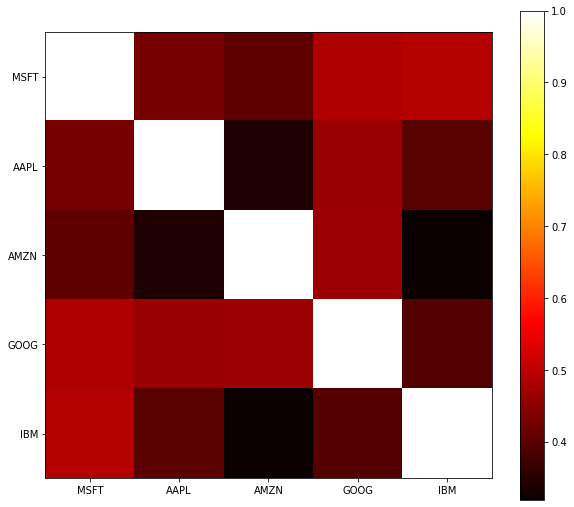

In [ ]:
plt.imshow(corr, cmap = 'hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

* Stocks Return rate and Risk

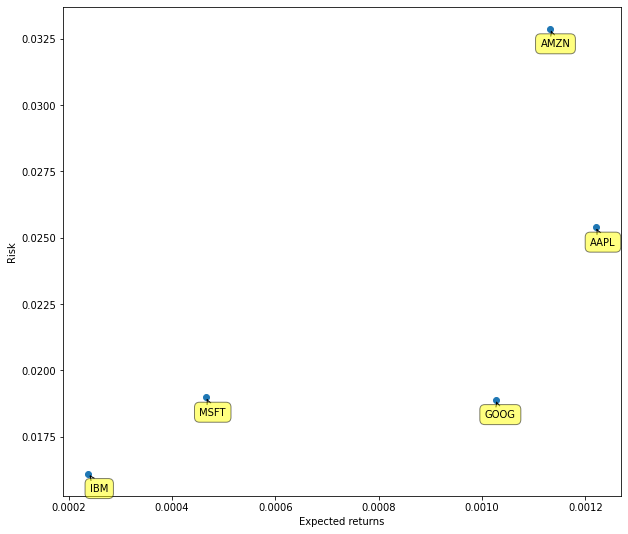

In [ ]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
  plt.annotate(label, xy = (x, y), xytext = (20, -20),
               textcoords = 'offset points', ha = 'right', va = 'bottom',
               bbox = dict(boxstyle = 'round, pad = 0.5', fc  = 'yellow',
                           alpha = 0.5), arrowprops = dict(arrowstyle = '->',
                                                           connectionstyle = 'arc3,rad = 0'))

# iii) Performance Metrics

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [ ]:
#Mean Squared Error
mse = metrics.mean_squared_error(test_data, fc)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.09036525601085134


In [ ]:
#RMSE is the standard deviation of the errors it is same as MSE but the root of the value is considered
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(test_data, fc)))

Root Mean Squared Error:  0.300608143620314


# 2. Textual Analysis

In [48]:
import pandas as pd
import numpy as np 
df1 = pd.read_csv('/content/JISS/india-news-headlines.csv')
df1.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


* The dataset has 3 columns date, category and news. The publish_date column is parsed into date format. The headine_category column is not important and won't contribute for the model building and hence the column will be dropped in the later step.

# A) Data Analysis

In [35]:
df1.tail(10)

,publish_date,headline_category,headline_text
3160319,20190930,home.education,IIT M.Tech fee hike not for existing students:...
3160320,20190930,city.chandigarh,Jananayak Janata Party releases second list of...
3160321,20190930,city.gurgaon,Jananayak Janata Party releases second list of...
3160322,20190930,city.faridabad,Jananayak Janata Party releases second list of...
3160323,20190930,city.mumbai,Man who lifted Andheri kid held in Gujarat aft...
3160324,20190930,city.kolkata,Bar bar dekho but note mat pheko: Kolkata cops
3160325,20190930,city.thane,Kalyan man held for rape
3160326,20190930,sports.more-sports.athletics,India's 4x400m mixed relay team finishes 7th i...
3160327,20190930,entertainment.hindi.bollywood,PHOTOS: Shahid Kapoor and Mira Rajput get papp...
3160328,20190930,tv.news.hindi,NaN


In [36]:
df1.shape

(3160329, 3)

In [37]:
df1.isnull().sum()

publish_date         0
headline_category    0
headline_text        1
dtype: int64

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160329 entries, 0 to 3160328
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 72.3+ MB


In [39]:
df1.describe()

,publish_date
count,3.160329e+06
mean,2.012156e+07
std,4.756475e+04
min,2.001010e+07
25%,2.009081e+07
50%,2.013033e+07
75%,2.016061e+07
max,2.019093e+07


In [40]:
df1.max()

publish_date            20190930
headline_category    young-turks
dtype: object

In [41]:
df1.min()

publish_date                 20010101
headline_category    2008-in-pictures
dtype: object

In [43]:
df1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'times-fact-check.news', 'elections.assembly-elections.haryana',
       'elections.assembly-elections.maharashtra'], dtype=object)

In [44]:
df1.corr()

,publish_date
publish_date,1.0


In [45]:
df1.shape

(3160329, 3)

# B) Data Visualization

# i) EDA (Exploratry data analysis) using NLP and NLTK tools

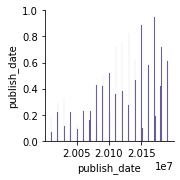

In [46]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

* Remove URL from the text

In [47]:
df1['headline_text'].value_counts()

In [49]:
df1['headline_category'].value_counts()

india                                                         280286
unknown                                                       207732
city.mumbai                                                   129819
city.delhi                                                    119509
business.india-business                                       111953
city.chandigarh                                               104768
city.hyderabad                                                 91094
city.bengaluru                                                 89257
entertainment.hindi.bollywood                                  87879
city.ahmedabad                                                 81306
city.lucknow                                                   80837
city.pune                                                      79555
city.kolkata                                                   77147
city.nagpur                                                    72438
city.goa                          

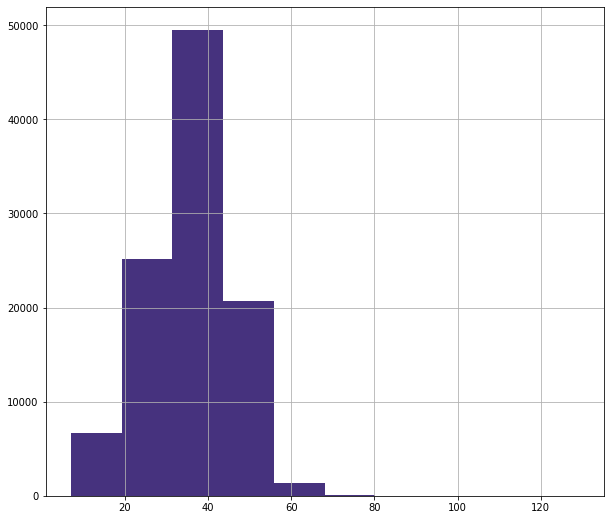

In [ ]:
df1['headline_text'].str.len().hist()
plt.show()

* Graph shows that news headlines range from 10 to 120 characters generally.

In [ ]:
def basic_clean(text):
        wnl = nltk.stem.WordNetLemmatizer()
        stopwords = nltk.corpus.stopwords.words('english')
        words = re.sub(r'[^\w\s]', '', text).split()
        return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
words = basic_clean(''.join(str(df1['headline_text'].tolist())))
words[:10]

['win',
 'cena',
 'satisfying',
 'defeating',
 'undertaker',
 'bigger',
 'roman',
 'reign',
 'Status',
 'quo']

# ii) N-Gram Analysis
* In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles.
## N-gram Analysis - Unigram, Bigram and Trigram

# a) Unigram Analysis

In [ ]:
words_unigram_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

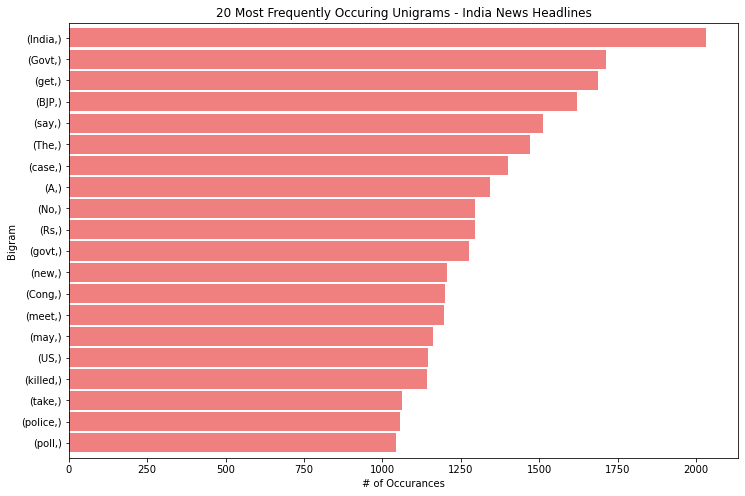

In [ ]:
words_unigram_series.sort_values().plot.barh(color='lightcoral', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Unigrams - India News Headlines')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

# b) Bigram Analysis

In [ ]:
words_bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

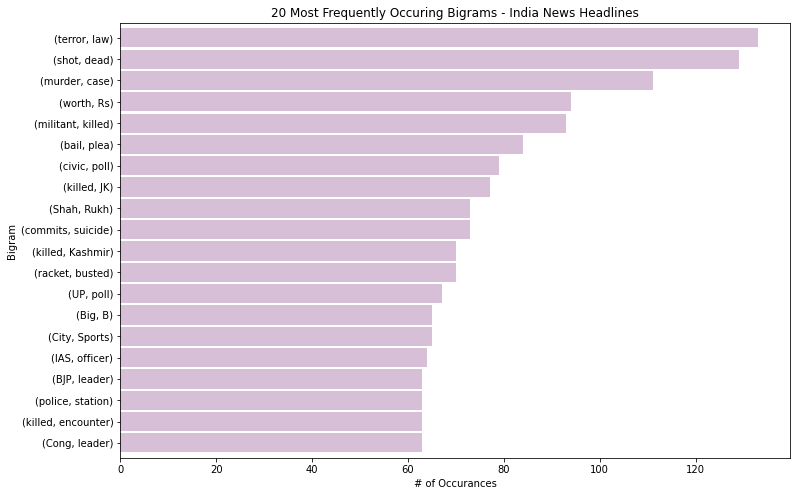

In [ ]:
words_bigrams_series.sort_values().plot.barh(color='thistle', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams - India News Headlines')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

# c) Trigram Analysis

Text(0.5, 0, '# of Occurances')

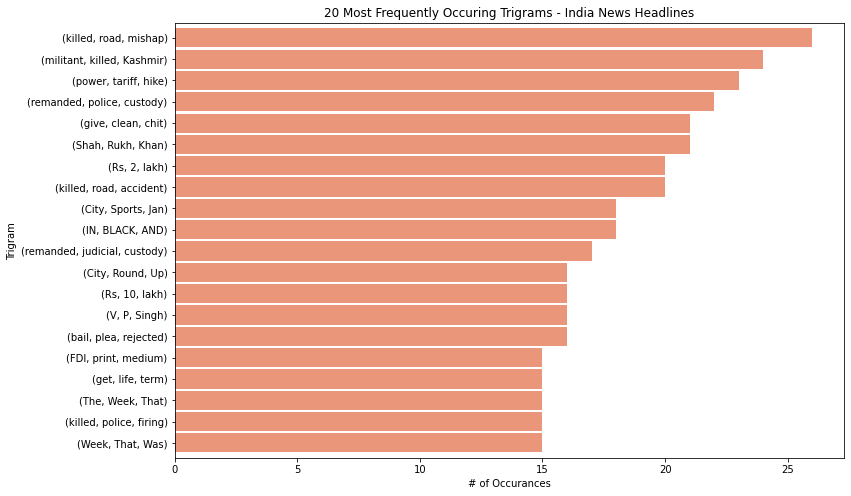

In [ ]:
words_trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
words_trigrams_series.sort_values().plot.barh(color='darksalmon', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams - India News Headlines')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

# Conclusion
### Inorder to complete this GRIP-Task 7 , we have created a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines Stock to analyze and predict - SENSEX (S&P BSE SENSEX) is also completed and in addition to the same we have done the n gram analysis and have ploted the outputs graphically.
## Completed Task 7.
### Thank you for going through this solution